Hui Qi. 2023.4.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("combine_add_geo.csv")
df

,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,Media,Account Created Date,...,Covid Tests,Covid Vaccinations,Image Caption,Detected Objects,tika_language,google_language,rtg_translate,geo_name,long,lat
0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",https://image.pixstory.com/Pixstory-image-1666...,2022/9/4 19:39,...,0.0,16637213.0,a sign that is on the side of a building .,"['street sign', 'scoreboard']",en,en,Qatar Airways has withdrawn flights from 18 de...,NaN,NaN,NaN
1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",https://image.pixstory.com/Pixstory-image-1666...,2022/10/16 23:31,...,0.0,12556239.0,a collage of photos of a person holding a pair...,"['envelope', 'menu']",en,en,Positive thinking does not necessarily mean av...,NaN,NaN,NaN
2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",https://image.pixstory.com/Pixstory-image-1666...,2022/9/4 18:04,...,0.0,16637213.0,a red and white fire hydrant sitting on top of...,"['book jacket, dust cover, dust jacket, dust w...",en,en,FIFA's president sought Monday to dispell ling...,"['South Africa', 'Gulf County']","['24.0', '-85.26101']","['-29.0', '29.90862']"
3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",https://image.pixstory.com/Pixstory-image-1666...,2022/9/4 20:27,...,0.0,16637213.0,a tennis court with a tennis racket and a ball,"['dome', 'mosque']",en,en,Ticket sales for the FIFA World Cup Qatar 2022...,['United Arab Emirates'],['54.5'],['23.75']
4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\r\n<p dir=""ltr"">Almost all o...",https://image.pixstory.com/Pixstory-image-1666...,2021/9/27 13:00,...,7878605.0,132857432.0,a piece of chocolate cake sitting on top of a ...,"['ice cream, icecream', 'dough']",en,en,"\r\nAlmost all of us is a fan of ice creams, f...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,69290,STY1642159740,21189,USR1642158120,NaN,21,Bts,Bts j hope,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:32,...,12939335.0,109788076.0,a woman is taking a picture of herself in a mi...,"['brassiere, bra, bandeau', 'hair spray']",nl,nl,i hope,NaN,NaN,NaN
94996,69289,STY1642159721,21194,USR1642158805,female,18,I LOVE SHARK TANK INDIA,It's breathe of fresh air in a polluted enviro...,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:43,...,12939335.0,109788076.0,a man holding a frisbee in his hands .,"['web site, website, internet site, site', 'pi...",en,en,It's breathe of fresh air in a polluted enviro...,NaN,NaN,NaN
94997,69288,STY1642159611,21203,USR1642159306,NaN,21,Patanjali-Good for health.,I use this Ayurveda product for boosting my im...,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:51,...,12939335.0,109788076.0,a red and white fire hydrant sitting in the mi...,"['pill bottle', 'lotion']",en,en,I use this Ayurveda product for boosting my im...,NaN,NaN,NaN
94998,69287,STY1642159601,21202,USR1642159269,NaN,22,Football League,Me and my friend playing football inside our c...,https://image.pixstory.com/Pixstory-image-1642...,2022/1/14 16:51,...,12939335.0,109788076.0,a group of people standing on top of a lush gr...,['croquet ball'],en,en,Me and my friend playing football inside our c...,NaN,NaN,NaN



### Is there a correlation between post language and identified mentioned locations?

In [3]:
geo_lan_dic ={}
for i in range(len(df)):
    language = df["tika_language"][i]
    
    # check if geo_name column has geolocation names
    if pd.isnull(df['geo_name'][i])==False   :
        geo_infomration = df['geo_name'][i]
        geo_infomration = geo_infomration[2:-2]
        geo_infomration = geo_infomration.replace('\'',"")
        geo_name = geo_infomration.split(",") # a list of goe_names in each row
        for name in geo_name:
            name = name.strip()
            #print(name)
            
            
            if name not in geo_lan_dic:
                #print(i)
                #print(gender)
                geo_lan_dic[name] = {}
                geo_lan_dic[name][language] = geo_lan_dic[name].get(language, 0) + 1
            else:
                geo_lan_dic[name][language] = geo_lan_dic[name].get(language, 0) + 1
        #print(geo_infomration)
        #print(geo_name)
print(geo_lan_dic)

{'South Africa': {'en': 334, 'bn': 5, 'it': 9}, 'Gulf County': {'en': 42}, 'United Arab Emirates': {'en': 44, 'bn': 1}, 'Hollywood': {'en': 442, 'fr': 1, 'it': 16, 'bn': 2, 'cy': 1, 'de': 1}, 'Los Angeles': {'en': 309}, 'Rocky Mount': {'en': 16}, 'Bangladesh': {'ms': 1, 'en': 84, 'bn': 108, 'ml': 1, 'it': 4}, 'New York City': {'en': 97, 'it': 3}, 'New York': {'en': 304, 'fr': 1, 'bn': 3, 'it': 25}, 'Batman': {'en': 4}, 'Kingdom of Spain': {'en': 277, 'it': 67}, 'Republic of Colombia': {'en': 49, 'it': 4}, 'American Samoa': {'en': 180, 'bn': 2, 'it': 6}, 'Federative Republic of Brazil': {'en': 210, 'it': 12, 'ms': 1}, 'Mexico': {'en': 108, 'it': 13}, 'Paris': {'en': 636, 'fr': 15, 'it': 67, 'bn': 2, 'hi': 2, 'eu': 1}, 'People’s Republic of China': {'en': 551, 'fr': 3, 'bn': 11, 'it': 10}, 'Republic of France': {'en': 419, 'fr': 16, 'bn': 5, 'it': 39}, 'Redstone Arsenal': {'en': 35}, 'Leeds': {'en': 11}, 'Republic of Korea': {'en': 205, 'it': 10, 'ml': 1, 'bn': 3}, 'Islamic Republic of A

In [4]:
df_geo_lan = pd.DataFrame.from_dict(geo_lan_dic)

df_geo_lan = df_geo_lan.replace(np.nan, 0)
df_geo_lan

,South Africa,Gulf County,United Arab Emirates,Hollywood,Los Angeles,Rocky Mount,Bangladesh,New York City,New York,Batman,...,Austrian Legation Building,King’s Mills,Shaanxi,Idukki,Scandinavia,Lee Dam Center for Fine Art,Doom,Mon State,Eight Ash Green,Lasudiya Surajmal
en,334.0,42.0,44.0,442.0,309.0,16.0,84.0,97.0,304.0,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
bn,5.0,0.0,1.0,2.0,0.0,0.0,108.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
it,9.0,0.0,0.0,16.0,0.0,0.0,4.0,3.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fr,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ms,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ml,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
eu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# fine the top 15 geolocations that are mentioned by users in their narratives
geo_lan_index_top15 = df_geo_lan.sum(axis = 0).sort_values(ascending=False).head(15).index
geo_lan_index_top15 = list(geo_lan_index_top15)
geo_lan_index_top15

['British Indian Ocean Territory',
 'Manchester',
 'Islamic Republic of Afghanistan',
 'Delhi',
 'United States',
 'Commonwealth of Australia',
 'Paris',
 'Russian Federation',
 'Town of Italy',
 'Europe',
 'England',
 'Madrid',
 'United Kingdom of Great Britain and Northern Ireland',
 'Islamic Republic of Pakistan',
 'People’s Republic of China']

In [6]:
df_geo_lan_2 = pd.DataFrame(df_geo_lan, columns = geo_lan_index_top15)

df_geo_lan_2

,British Indian Ocean Territory,Manchester,Islamic Republic of Afghanistan,Delhi,United States,Commonwealth of Australia,Paris,Russian Federation,Town of Italy,Europe,England,Madrid,United Kingdom of Great Britain and Northern Ireland,Islamic Republic of Pakistan,People’s Republic of China
en,3602.0,1312.0,975.0,894.0,855.0,727.0,636.0,612.0,194.0,541.0,587.0,531.0,559.0,569.0,551.0
bn,218.0,0.0,3.0,49.0,10.0,1.0,2.0,11.0,1.0,3.0,9.0,1.0,8.0,11.0,11.0
it,6.0,120.0,21.0,1.0,73.0,28.0,67.0,83.0,506.0,129.0,56.0,58.0,23.0,2.0,10.0
fr,2.0,0.0,1.0,0.0,2.0,0.0,15.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0
cy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ms,3.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ml,25.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0
hi,44.0,0.0,0.0,12.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
eu,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_geo_lan_2.shape

(28, 15)

In [8]:
df_geo_lan_3 = df_geo_lan_2.iloc[0:16,:]
df_geo_lan_3

,British Indian Ocean Territory,Manchester,Islamic Republic of Afghanistan,Delhi,United States,Commonwealth of Australia,Paris,Russian Federation,Town of Italy,Europe,England,Madrid,United Kingdom of Great Britain and Northern Ireland,Islamic Republic of Pakistan,People’s Republic of China
en,3602.0,1312.0,975.0,894.0,855.0,727.0,636.0,612.0,194.0,541.0,587.0,531.0,559.0,569.0,551.0
bn,218.0,0.0,3.0,49.0,10.0,1.0,2.0,11.0,1.0,3.0,9.0,1.0,8.0,11.0,11.0
it,6.0,120.0,21.0,1.0,73.0,28.0,67.0,83.0,506.0,129.0,56.0,58.0,23.0,2.0,10.0
fr,2.0,0.0,1.0,0.0,2.0,0.0,15.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0
cy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ms,3.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ml,25.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0
hi,44.0,0.0,0.0,12.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
eu,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


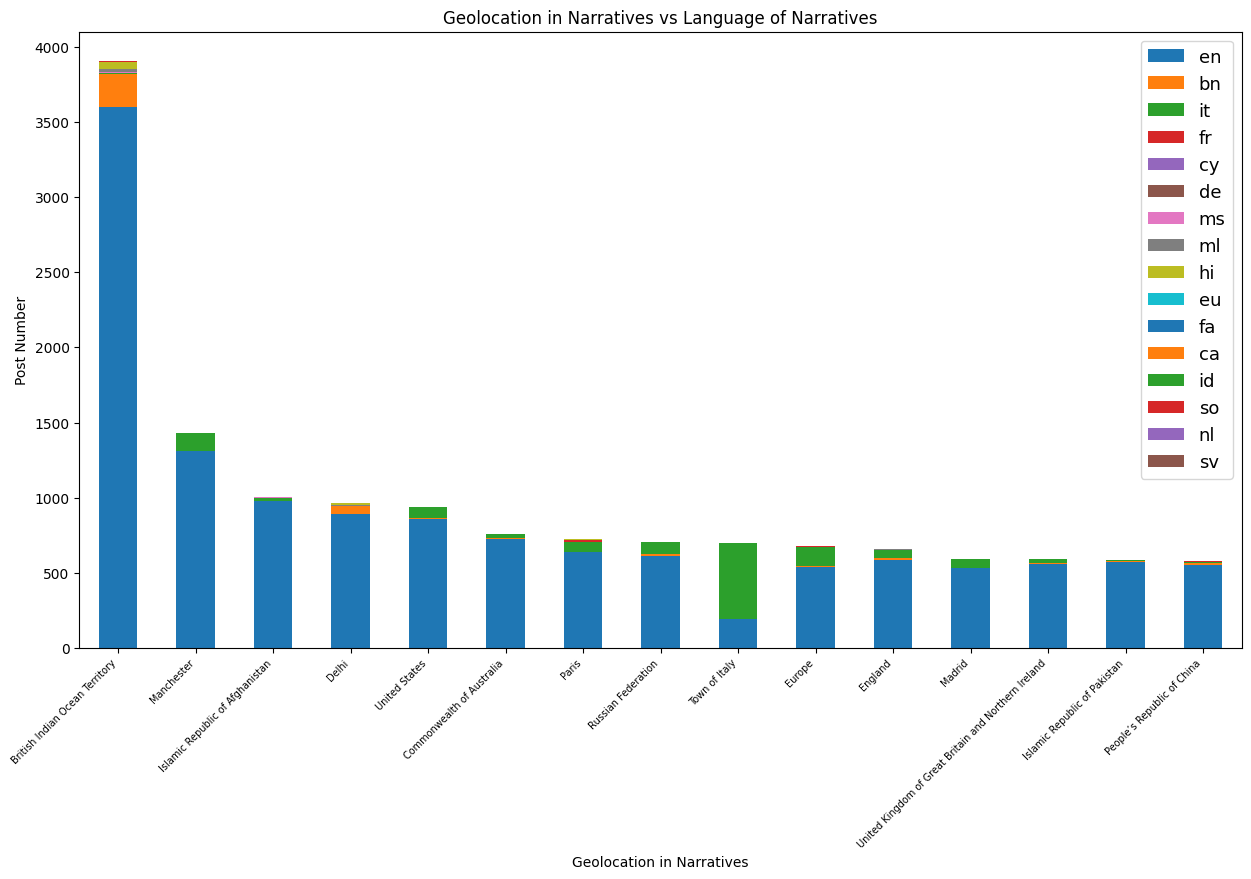

In [9]:
df_geo_lan_3.T.plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title("Geolocation in Narratives vs Language of Narratives")

plt.xlabel("Geolocation in Narratives")
plt.ylabel("Post Number")
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=7)
plt.legend(prop={'size': 13})
plt.savefig('geotopics vs language.png')
plt.show()